In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

In [41]:
dtframe = pd.read_csv("/content/sample_data/CONVENIENT_global_confirmed_cases.csv")
dtframe
dtframe = dtframe.iloc[1:]
dtframe

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia.1,Australia.2,Australia.3,Australia.4,Australia.5,Australia.6,Australia.7,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,...,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom.1,United Kingdom.2,United Kingdom.3,United Kingdom.4,United Kingdom.5,United Kingdom.6,United Kingdom.7,United Kingdom.8,United Kingdom.9,United Kingdom.10,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,11/18/20,223.0,711.0,1038.0,67.0,104.0,5.0,10332.0,1589.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,7091.0,2239.0,11.0,174.0,2111.0,2.0,1309.0,5182.0,38.0,32.0,0.0,96.0,1633.0,0.0,34091.0,0.0,3938.0,18.0,1592.0,10.0,40.0,0.0,0.0,...,327.0,0.0,4.0,4007.0,6114.0,83.0,2.0,42.0,0.0,8.0,0.0,30.0,45.0,2049.0,4215.0,170384.0,342.0,12764.0,1292.0,0.0,1.0,0.0,1.0,22.0,1.0,11.0,0.0,0.0,0.0,19609.0,88.0,210.0,0.0,300.0,12.0,1251.0,0.0,2.0,37.0,36.0
302,11/19/20,377.0,786.0,1023.0,48.0,212.0,0.0,10097.0,1520.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,2.0,6995.0,2597.0,25.0,135.0,2364.0,1.0,1382.0,4477.0,60.0,0.0,0.0,187.0,1180.0,491.0,35918.0,0.0,3899.0,16.0,1560.0,0.0,82.0,0.0,632.0,...,439.0,252.0,2.0,4609.0,5007.0,72.0,2.0,41.0,0.0,4.0,0.0,19.0,53.0,0.0,4542.0,187955.0,243.0,13630.0,1153.0,0.0,2.0,0.0,0.0,11.0,0.0,5.0,2.0,0.0,1.0,22915.0,81.0,63.0,0.0,315.0,4.0,1110.0,0.0,3.0,70.0,65.0
303,11/20/20,215.0,836.0,1103.0,76.0,133.0,0.0,9608.0,1667.0,0.0,10.0,0.0,2.0,1.0,0.0,0.0,1.0,6668.0,3169.0,19.0,150.0,2275.0,0.0,1457.0,3416.0,38.0,0.0,0.0,98.0,1237.0,0.0,38397.0,0.0,3983.0,0.0,1532.0,8.0,70.0,1.0,0.0,...,439.0,231.0,5.0,7240.0,4946.0,88.0,2.0,43.0,0.0,10.0,0.0,

In [25]:
df = dtframe[['Australia', 'Canada', 'China', 'Denmark', 'France',
              'Netherlands', 'United Kingdom']]
df.head(10)

,Australia,Canada,China,Denmark,France,Netherlands,United Kingdom
1,0.0,0.0,8.0,0.0,0.0,0.0,0.0
2,0.0,0.0,6.0,0.0,0.0,0.0,0.0
3,0.0,0.0,24.0,0.0,0.0,0.0,0.0
4,0.0,0.0,21.0,0.0,0.0,0.0,0.0
5,0.0,0.0,10.0,0.0,0.0,0.0,0.0
6,0.0,0.0,36.0,0.0,0.0,0.0,0.0
7,0.0,0.0,46.0,0.0,0.0,0.0,0.0
8,0.0,0.0,48.0,0.0,0.0,0.0,0.0
9,0.0,0.0,37.0,0.0,0.0,0.0,0.0
10,0.0,0.0,60.0,0.0,0.0,0.0,0.0


In [26]:
dtframe['confirmed_globally'] = dtframe.sum(axis=1)

In [27]:
dtframe.confirmed_globally

1           4.0
2          10.0
3           7.0
4          10.0
5           6.0
         ...   
301    618446.0
302    645363.0
303    660598.0
304    574367.0
305    485588.0
Name: confirmed_globally, Length: 305, dtype: float64

In [28]:
confirmedvictims = dtframe['confirmed_globally'].sum()
confirmedvictims

58133288.0

In [29]:
epidemics = pd.DataFrame({
    'epidemic': ['SARS', 'EBOLA', 'MERS', 'H1N1'],
    'start_year': [2003, 2004, 2012, 2009],
    'end_year': [2004, 2006, 2017, 2010],
    'confirmed': [8096, 28646, 2494, 6724149],
    'deaths': [774, 11323, 858, 19654]

})

In [30]:
epidemics

,epidemic,start_year,end_year,confirmed,deaths
0,SARS,2003,2004,8096,774
1,EBOLA,2004,2006,28646,11323
2,MERS,2012,2017,2494,858
3,H1N1,2009,2010,6724149,19654


In [31]:
Covid19 = {'epidemic': 'COVID-19', 'start_year': 2019, 'end_year': 2020, 'confirmed': confirmedvictims,
           'deaths': 1388051}
epidemics = epidemics.append(Covid19, ignore_index=True)


In [32]:
epidemics

,epidemic,start_year,end_year,confirmed,deaths
0,SARS,2003,2004,8096.0,774
1,EBOLA,2004,2006,28646.0,11323
2,MERS,2012,2017,2494.0,858
3,H1N1,2009,2010,6724149.0,19654
4,COVID-19,2019,2020,58133288.0,1388051


In [33]:
epidemics['Mortlity'] = epidemics['confirmed'] / epidemics['deaths'] * 100

In [34]:
epidemics

,epidemic,start_year,end_year,confirmed,deaths,Mortlity
0,SARS,2003,2004,8096.0,774,1045.994832
1,EBOLA,2004,2006,28646.0,11323,252.989490
2,MERS,2012,2017,2494.0,858,290.675991
3,H1N1,2009,2010,6724149.0,19654,34212.623385
4,COVID-19,2019,2020,58133288.0,1388051,4188.123347


<BarContainer object of 5 artists>

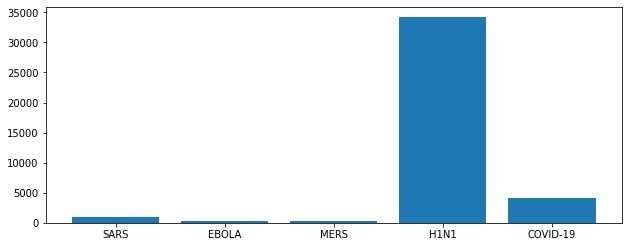

In [35]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_axes([0, 1, 1, 1])
ax.bar(epidemics.epidemic, epidemics.Mortlity)